In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
// y_2 = phase2 >= err2 ? 1 : 0;
//   err2 = (y_2 ? wavelen2 : 0) - phase2 + err2;
//   gpio_put(OSC3_PIN, y_2);

SyntaxError: invalid syntax (2241719993.py, line 1)

In [229]:
125000000/16/16

488281.25

In [228]:
(125000000/16/16) / 20

24414.0625

In [209]:
wavelen=390625
# wavelen = 48000/20
wavelen

390625

In [210]:
x = arange(wavelen)

In [211]:
len(x)

390625

In [212]:
125000000/8 / 20

781250.0

In [213]:
y=0
err=0
phase=0

bs = zeros_like(x)
for i in range(len(bs)):
    y = 1 if phase >= err else 0
    err = ((wavelen) if y else 0) - phase + err
    phase = phase + 1
    if (phase >= wavelen):
        phase=0
    bs[i] = y

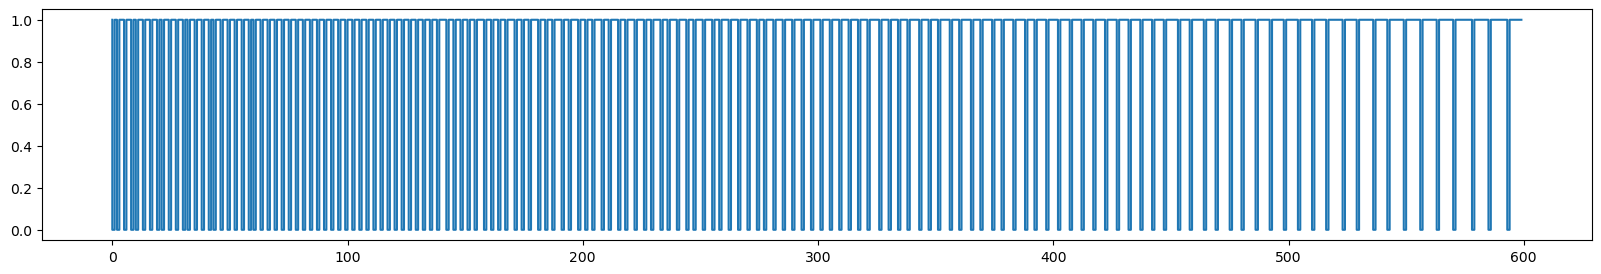

In [79]:
figsize(20,3)
data = bs[1500:2100]
step(arange(len(data)),data)

In [16]:
range(10)[0]

0

In [214]:
def bsToFlipTable(x):
    prevx=x[0]
    sectionlen=1
    flipTable = []
    for i in range(1, len(x)-1):
        if x[i] != prevx:
            flipTable.append(sectionlen)
            sectionlen=1
        else:
            sectionlen = sectionlen + 1
        prevx = x[i]
    return flipTable

In [215]:
ft = bsToFlipTable(bs)
len(ft)

195312

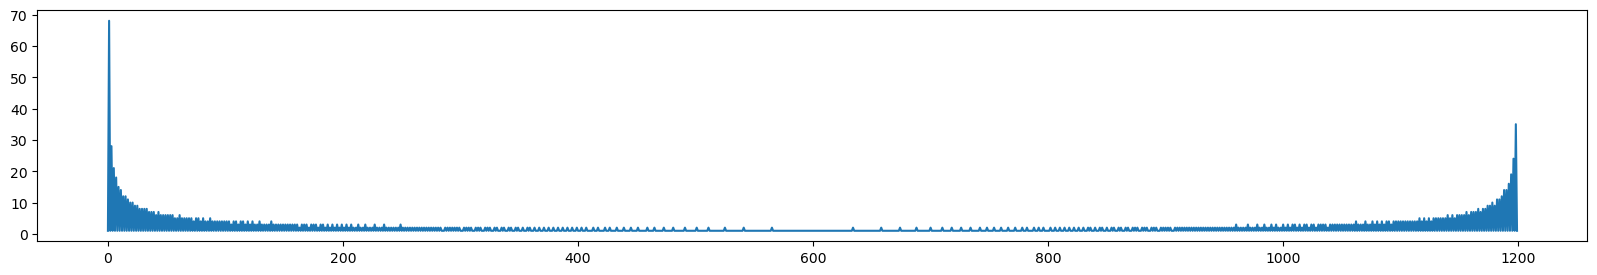

In [19]:
plot(ft)

In [155]:
ft[-50:]

[6,
 1,
 6,
 1,
 6,
 1,
 7,
 1,
 6,
 1,
 7,
 1,
 7,
 1,
 7,
 1,
 8,
 1,
 7,
 1,
 8,
 1,
 8,
 1,
 9,
 1,
 9,
 1,
 10,
 1,
 9,
 1,
 11,
 1,
 11,
 1,
 12,
 1,
 14,
 1,
 14,
 1,
 16,
 1,
 19,
 1,
 24,
 1,
 35,
 1]

In [21]:
390626 * 2 / 1024

762.94140625

In [42]:
a = arange(200,0,-1) / 200

In [58]:
b = pow(a,100)

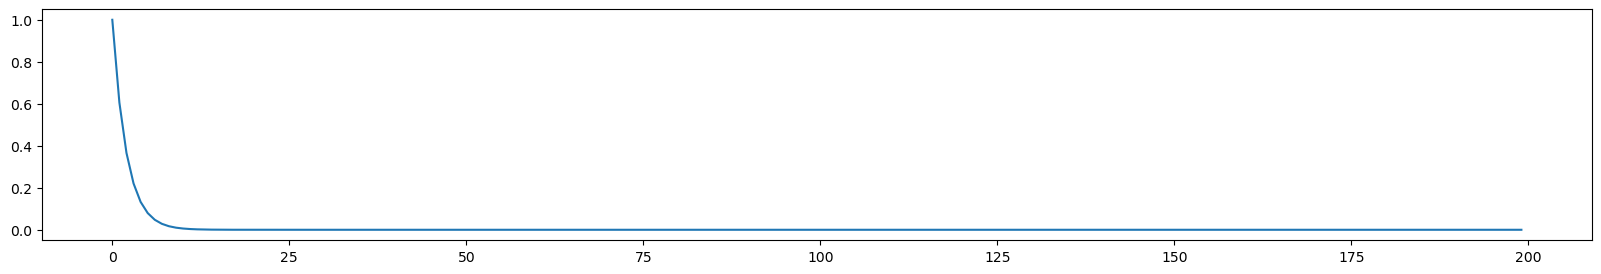

In [59]:
plot(b)

In [64]:
1200 >> 4

75

In [94]:
w = 1200
for i in range(100):
    print(w)
    w = w - (w >> 4) -1

1200
1124
1053
987
925
867
812
761
713
668
626
586
549
514
481
450
421
394
369
345
323
302
283
265
248
232
217
203
190
178
166
155
145
135
126
118
110
103
96
89
83
77
72
67
62
58
54
50
46
43
40
37
34
31
29
27
25
23
21
19
17
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [101]:
1/14

0.07142857142857142

In [109]:
x = zeros(8)
for i in range(8):
    print(i)
    x[i] = max(0.001,abs(sin(i*0.1)))

x = x/sum(x)
x

0
1
2
3
4
5
6
7


array([0.00037415, 0.03735264, 0.07433207, 0.1105688 , 0.14570076,
       0.17937692, 0.21126081, 0.24103385])

In [110]:
sum(x)


1.0

In [80]:
# aft = []
# phase=0
# wvl=1200
# #look ahead and find the length of phase which gives the area of 1 pulse
# def pulseLen(currPhase, area):
#     return sqrt(2 * (area + ((currPhase**2)*0.5)))
    
# def fillBuffer(wavelen):
#     global phase
#     pulseArea = 1/wavelen
    
#     quantum = wavelen//64
#     phase = phase +  quantum

# while (phase < wvl):
#     fillBuffer(wvl)

In [142]:
1200*1200/2

720000.0

In [217]:

import struct

def fast_reciprocal(x):
    # Ensure we don't attempt to compute reciprocal of zero
    return 1/x

def fast_inv_sqrt(x):
    # Convert float to its bit-level representation (using struct.pack and struct.unpack)
    xhalf = 0.5 * x
    i = struct.unpack('i', struct.pack('f', x))[0]  # Convert float to int (bitwise representation)
    i = 0x5f3759df - (i >> 1)  # Magic constant and bit manipulation
    x = struct.unpack('f', struct.pack('i', i))[0]  # Convert back to float
    x = x * (1.5 - xhalf * x * x)  # One iteration of Newton-Raphson to improve accuracy
    return x
    
#this function rearranges the area under saw function above, to return the length of phase which given an area of 1/wavelength
def pulseLen(currPhase, area):
    # b = 2 * (area + ((currPhase**2)*0.5))
    # s1 = 1.0/fast_inv_sqrt(b)
    # s2 = sqrt(b)
    # print(b, s1, s2, (s2-s1))
    # return s2 - currPhase
    return sqrt(2 * (area + ((currPhase**2)*0.5))) - currPhase
    

In [147]:
1/2400

0.0004166666666666667

In [148]:
pulseLen(0.7,1/2400) * 2400

1.4279645586962708

In [87]:
pulseLen(0.995, 5/2400) * 2400

9.057290282403496

In [83]:
0.02886*2400

69.264

In [226]:
##todo: event to track wavelen changes at ctrl rate, precalc coefficients

aft = []
phase=0
wvl=390625/16
#look ahead and find the length of phase which gives the area of 1 pulse
    
def fillBuffer(wavelen):
    global phase
    divisor=512
    pl = pulseLen(phase % 1, divisor/wvl)
    pl_samples = pl * wvl
    ontime=1.0
    offtime=1.0
    if (pl_samples >= divisor*2):
        ontime=1
        offtime=pl_samples-1
    else:
        ontime = 1.0/((pl_samples-divisor)/divisor)
        offtime=1
    
    # print(phase, pl, pl_samples, round(ontime), round(offtime))
    phase = phase + ((ontime+offtime)/wvl)
    aft.append(round(ontime))
    aft.append(round(offtime))
    

while (phase <1.1):
    fillBuffer(wvl)

In [227]:
len(aft)

5746